In [165]:
import os
import matplotlib.pyplot as plt
from rlxutils import subplots
import pickle
import pandas as pd
import numpy as np
from progressbar import progressbar as pbar

In [2]:
def ploth(h, data_module=None, name='loss', ylim=None, ax=None, color='blue'):
    
    lossp = pd.DataFrame(h, columns=['signal'])
    lossp[f'smoothed'] = lossp['signal'].rolling(500).mean()
    plt.plot(lossp['signal'], color=color, alpha=.1)
    plt.plot(lossp[f'smoothed'], color=color, alpha=1, label=name)
    plt.grid(); plt.xlabel("steps"); plt.ylabel("loss")
    if ylim is not None:
        plt.ylim(*ylim)
    return lossp

In [170]:
lfiles = sorted([f for f in os.listdir(".") if f.endswith(".pkl")])
len(lfiles)

38

In [171]:
colors = {'unet_pretrained_fconly': 'red', 
          'scratch': 'black'}

In [ ]:
for ax,lfile in pbar(subplots(lfiles, n_cols=8)):
    with open(lfile, "rb") as f:
        lh = pickle.load(f)    
    for name in lh.keys():
        pp = ploth(lh[name], data_module = None, name=name, color=colors[name])
    plt.legend()
    plt.ylim(0,0.5)
    plt.grid()
    plt.title(lfile.split(".")[0])
    plt.ylim(0,0.5)

| |                #                                 | 37 Elapsed Time: 0:00:11


In [173]:
r = {}
for lfile in lfiles:
    with open(lfile, "rb") as f:
        lh = pickle.load(f)    
    r[lfile]= {}
    for name in lh.keys():
        r[lfile][name] = np.mean(lh[name][-100:])
r = pd.DataFrame(r).T
((r['scratch'] < r['unet_pretrained_fconly'])).mean()

0.2894736842105263

In [155]:
((r['scratch'] > r['unet_pretrained_fconly'])).mean()

0.7142857142857143

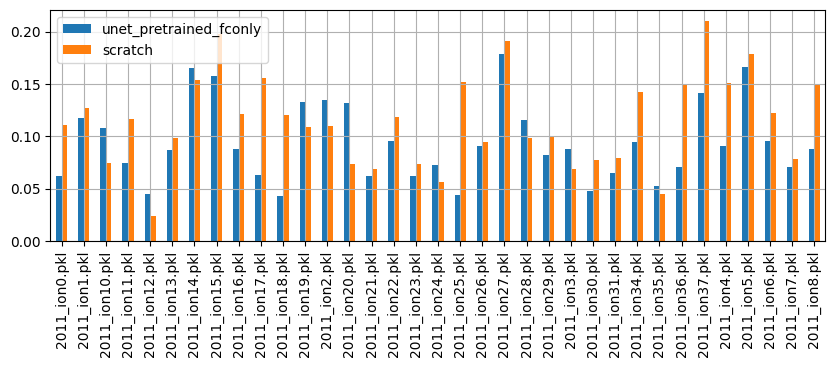

In [154]:
r.plot(kind='bar', figsize=(10,3))
plt.grid()

In [144]:
(r['unet_pretrained_fconly'] > r['scratch']).mean()

0.2857142857142857

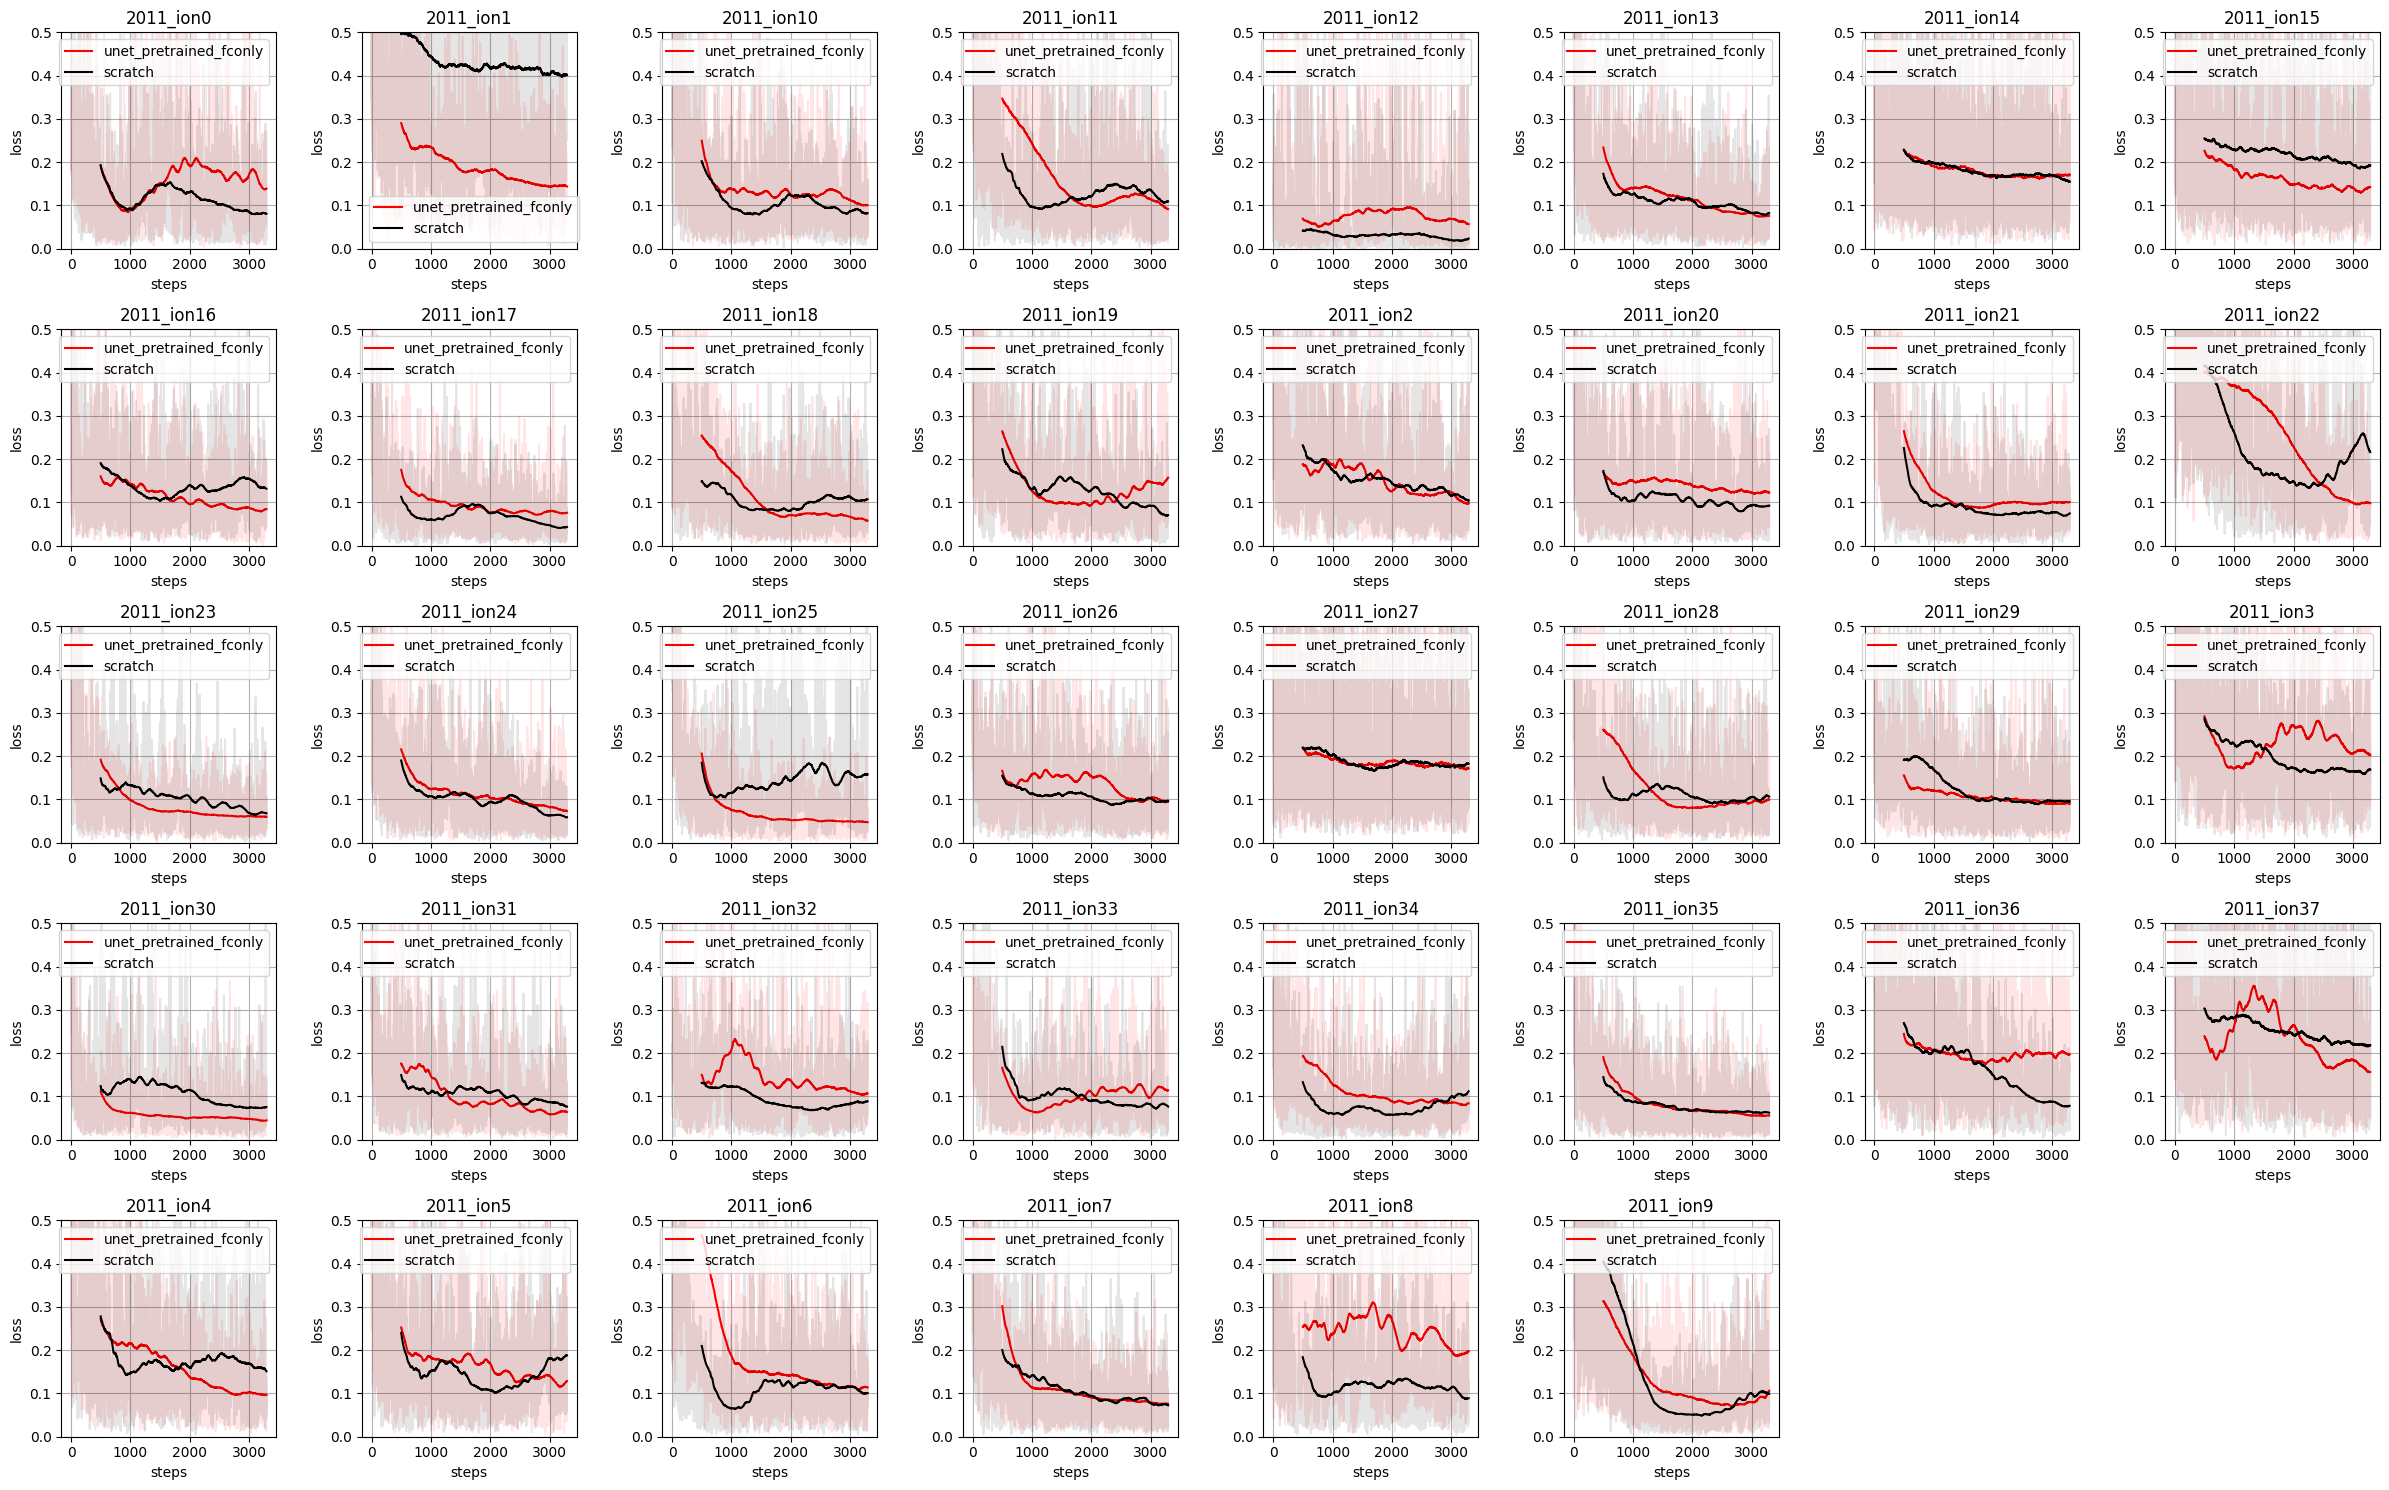

In [85]:
for ax,lfile in subplots(lfiles, n_cols=8):
    
    with open(lfile, "rb") as f:
        lh = pickle.load(f)    
    for name in lh.keys():
        pp = ploth(lh[name], data_module = None, name=name, color=colors[name])
    plt.legend()
    plt.ylim(0,0.5)
    plt.grid()
    plt.title(lfile.split(".")[0])
    plt.ylim(0,0.5)